In [2]:
from modules.merra2 import *
from modules.plot import plot_dataset

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import cmasher as cmr


plt.rcParams["figure.dpi"] = 120


def format_variable(variable: str) -> str:
    return f"{get_variable_name_from_code(variable)} ({get_units_from_variable(variable)})"


def plot_dataset(dataset: MERRA2Dataset, file: None | int = None, time: None | int = None, lev: None | int = None,
                 lat: None | int = None, lon: None | int = None, data_transform=lambda data: data, **kwargs) -> None:

    data = dataset.load(file=file, time=time, lev=lev, lat=lat)
    data = data_transform(data)

    # Latitude vs Longitude contour
    if isinstance(file, int) and isinstance(lev, int):
        _plot_latitude_longitude_contour(dataset, data, **kwargs)


def _plot_latitude_longitude_contour(dataset: MERRA2Dataset, data: np.ndarray, cmap=cmr.ocean) -> None:
    if dataset.ndims == 2:
        title = format_variable(dataset.variable)
        output = dataset.variable
    else:
        raise ValueError(f"{dataset.ndims} dataset dimensions not supported")        

    # elif dims == 3:
    #     output = f"{variable}" \
    #              f"-{format_date(filename, for_output=True)}-{format_time(time, filename)}"
    #     title = f"{format_variable(variable)} on {format_date(filename)} at {format_time(time, filename)}"
    # elif dims == 4:
    #     output = f"{variable}-{format_level(level, for_output=True)}" \
    #              f"-{format_date(filename, for_output=True)}-{format_time(time, filename)}"
    #     title = f"{format_variable(variable)} at {format_level(level)}" \
    #             f" on {format_date(filename)} at {format_time(time, filename)}"
    
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   # num=title,
                                   figsize=(8, 5), tight_layout=True, width_ratios=(97, 3))

    # if diverging:
    #     vmin, vmax = get_vmin_and_vmax(data)
    # else:
    #     vmin, vmax = None, None

    contour = ax1.imshow(data, cmap=cmap, origin="lower", aspect="auto",
                         # vmin=vmin, vmax=vmax,
                         extent=[-180, 180, -90, 90])

    cb = fig.colorbar(contour, cax=ax2, fraction=0.05, pad=0.02)
    cb.outline.set_visible(False)

    # if show_map:
    #     output += "-map"
    #     draw_map(ax1, *load_map(data.shape))

    ax1.tick_params(labelsize=7)
    ax1.set_title(title, fontsize=9)
    ax1.xaxis.set_major_formatter(FormatStrFormatter("%d°"))
    ax1.yaxis.set_major_formatter(FormatStrFormatter("%d°"))
    ax1.spines[:].set_visible(False)
    
    ax2.tick_params(labelsize=6, right=False, direction="in")

    plt.savefig(f"../generated/contours/{output}.png", dpi=300)
    plt.show()

dataset = MERRA2Dataset("../data/raw", "MERRA2_101.const_2d_asm_Nx.00000000.nc4", "FRLAND")
plot_dataset(dataset, file=0, cmap=cmr.ocean)


In [4]:
dataset = MERRA2Dataset("../data/raw", "MERRA2_101.const_2d_asm_Nx.00000000.nc4", "FROCEAN")
plot_dataset(dataset, file=0, cmap=cmr.ocean)

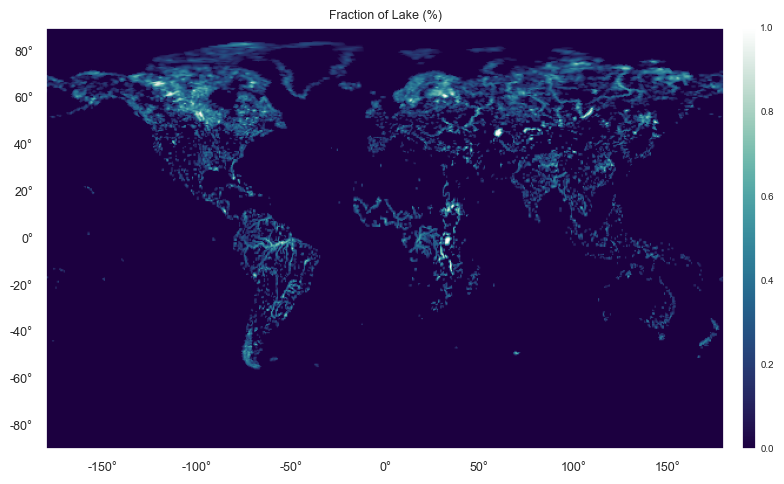

In [14]:
plot_contour_at_time_and_level(f"MERRA2_101.const_2d_asm_Nx.00000000.nc4", variable="FRLAKE",
                               time=0, level=0, cmap=cmr.ocean, data_processing=lambda data: np.cbrt(data))


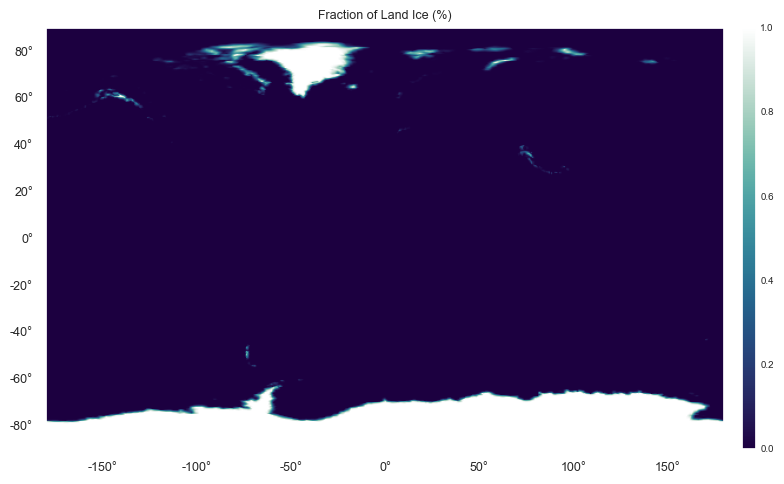

In [15]:
plot_contour_at_time_and_level(f"MERRA2_101.const_2d_asm_Nx.00000000.nc4", variable="FRLANDICE",
                               time=0, level=0, cmap=cmr.ocean)


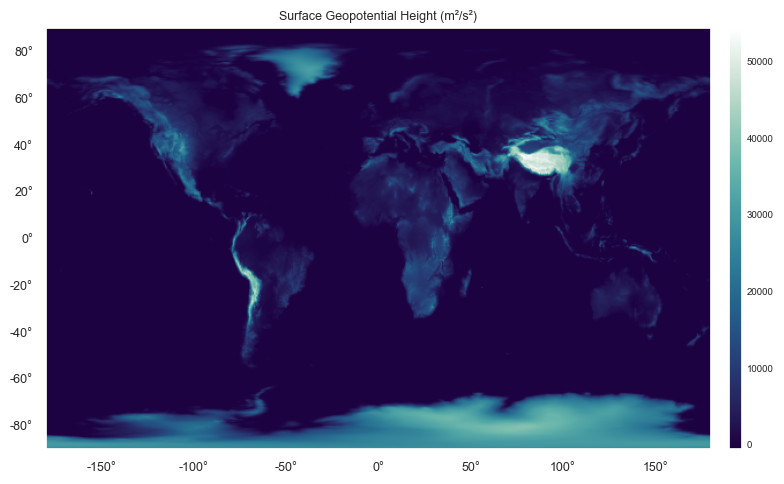

In [16]:
plot_contour_at_time_and_level(f"MERRA2_101.const_2d_asm_Nx.00000000.nc4", variable="PHIS",
                               time=0, level=0, cmap=cmr.ocean)


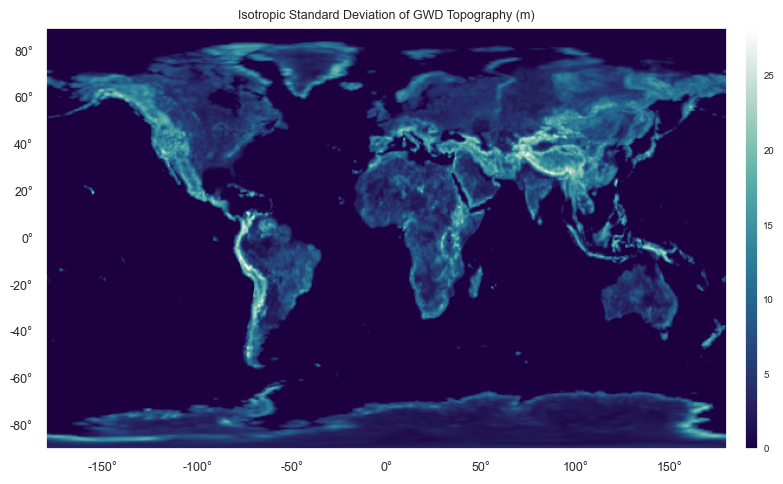

In [17]:
plot_contour_at_time_and_level(f"MERRA2_101.const_2d_asm_Nx.00000000.nc4", variable="SGH",
                               time=0, level=0, cmap=cmr.ocean, data_processing=lambda data: np.sqrt(data))


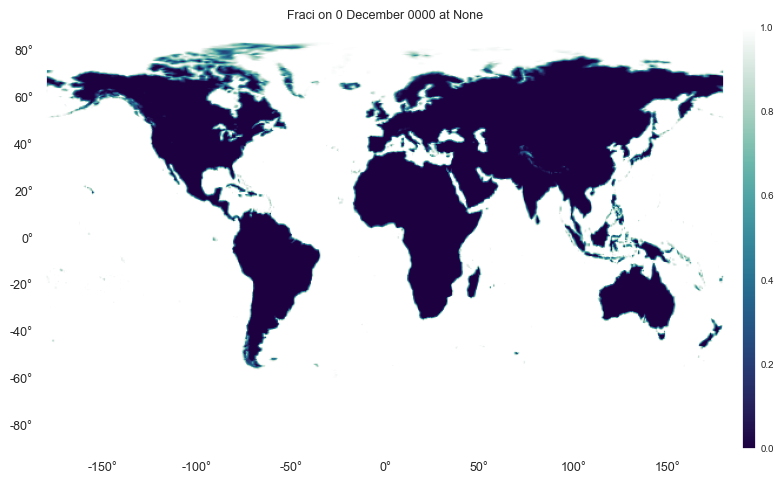

In [18]:
plot_contour_at_time_and_level("MERRA2_101.const_2d_ctm_Nx.00000000.nc4", variable="FRACI",
                               time=0, level=0, cmap=cmr.ocean)
